In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("MXvideos.csv", encoding='ISO-8859-1')


In [27]:
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [28]:
df.shape

(40451, 16)

In [29]:
missing_values = df.isnull().sum()
missing_values

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               4224
dtype: int64

In [30]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [31]:
df = df.drop(['description', 'comments_disabled'], axis=1)
df = df[df['ratings_disabled'] != True]
df = df[df['video_error_or_removed'] != True]
df.shape

(39793, 14)

In [32]:
from scipy.stats import zscore

# Sadece sayısal sütunlar
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Z-score hesapla
z_scores = zscore(numeric_df)
outlier_rows = (abs(z_scores) > 3).any(axis=1)
outliers = df[outlier_rows]

print(f"\nToplam aykırı satır sayısı: {outliers.shape[0]}")
print(outliers)



Toplam aykırı satır sayısı: 2077
          video_id trending_date  \
24     Wi3nAYFigpQ      17.14.11   
25     nEAMm3nGxpM      17.14.11   
35     GZGdFRttWDI      17.14.11   
53     kzwfHumJyYc      17.14.11   
59     J5sgeaTui0w      17.14.11   
...            ...           ...   
40377  gPHVLxm8U-0      18.14.06   
40390  GBbbEjfnLcw      18.14.06   
40406  xSnXAGm3ODY      18.14.06   
40420  WGOi_1XBclQ      18.14.06   
40430  7tmRxLHB9eE      18.14.06   

                                                   title  \
24                 Iraq/Iran Earthquake felt in Kuwait !   
25        El valiente ve la muerte solo una vez - Teaser   
35                     Â¡Top 10 Bromas LOCAS de Jackass!   
53     Sharry Mann: Cute Munda ( Song Teaser) | Parmi...   
59                    LA CUIN BICH (HISTORIAS DE TERROR)   
...                                                  ...   
40377  Courtney Hadwin: 13-Year-Old Golden Buzzer Win...   
40390                                  Nacha y Teresa

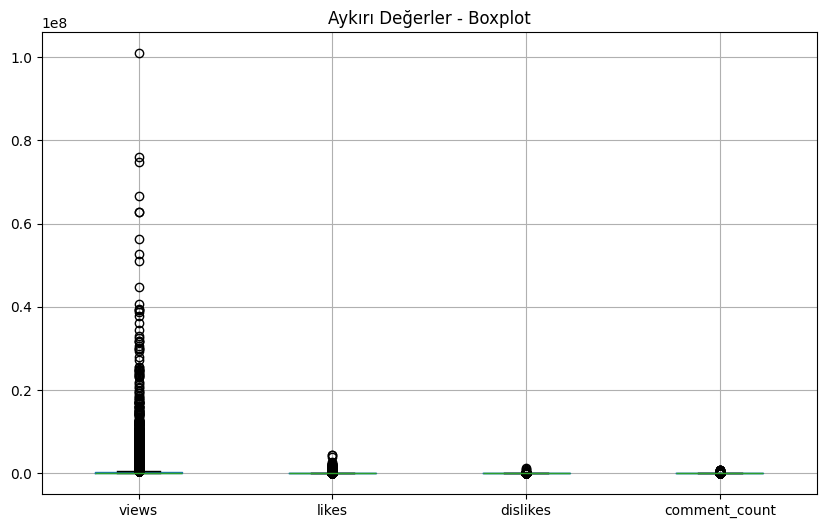

In [10]:
import matplotlib.pyplot as plt

df.boxplot(column=['views', 'likes', 'dislikes', 'comment_count'], figsize=(10,6))
plt.title("Aykırı Değerler - Boxplot")
plt.show()


In [13]:
missing_values = df.isnull().sum()
missing_values

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [43]:
import numpy as np

# Log dönüşüm (1 ekliyoruz çünkü log(0) tanımsız)
df['log_views'] = np.log1p(df['views'])
df['log_likes'] = np.log1p(df['likes'])
df['log_dislikes'] = np.log1p(df['dislikes'])
df['log_comment_count'] = np.log1p(df['comment_count'])

df


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,ratings_disabled,video_error_or_removed,log_views,log_likes,log_dislikes,log_comment_count
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,12.644750,8.338784,5.891644,7.515889
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,11.561458,5.605802,5.164786,5.913503
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,11.820888,9.220885,5.587249,6.410175
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,11.473706,5.937536,5.147494,5.342334
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,13.122295,10.964433,6.525030,8.913147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40446,r63VBOagGAo,18.14.06,Shawn Mendes x Portugal (FPF Official World Cu...,FPFutebolOficial,17,2018-06-13T13:11:56.000Z,"Canal|""Oficial""|""da""|""FederaÃ§Ã£o""|""Portuguesa...",653114,65639,547,3826,https://i.ytimg.com/vi/r63VBOagGAo/default.jpg,False,False,13.389509,11.091941,6.306275,8.249836
40447,i7r_kMbyngk,18.14.06,AMLO llegÃ³ con su esposa al Tercer Debate en ...,AMX,25,2018-06-13T01:15:08.000Z,"AMLO|""morena""|""polÃ­tica""|""PRI""|""PAN""|""PRD""|""L...",121674,3558,58,491,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,11.709109,8.177235,4.077537,6.198479
40448,_jnwjdMe3Zo,18.14.06,Maire usa una blusa kawaiii Â¿adorable o ridÃ­...,Historias Wink,24,2018-06-13T15:08:53.000Z,"maire|""maire vs el internet""|""maire vs interne...",14067,538,6,90,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,9.551658,6.289716,1.945910,4.510860
40449,pAH9omNAWA4,18.14.06,La Jefa del CampeÃ³n - CapÃ­tulo 2 Parte 3/4,Tele Time,22,2018-06-13T02:22:33.000Z,[none],22898,94,11,3,https://i.ytimg.com/vi/pAH9omNAWA4/default.jpg,False,False,10.038849,4.553877,2.484907,1.386294


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,precision_score, recall_score, confusion_matrix



X = df[['log_likes', 'log_dislikes', 'log_comment_count']]
y = df['log_views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)


print(f"Ortalama Kare Hata (MSE): {mse}")
print(f"R-kare (R2) Değeri: {r2}")
mae

Ortalama Kare Hata (MSE): 0.5333862978780843
R-kare (R2) Değeri: 0.8255327784925552


0.5813558897738726

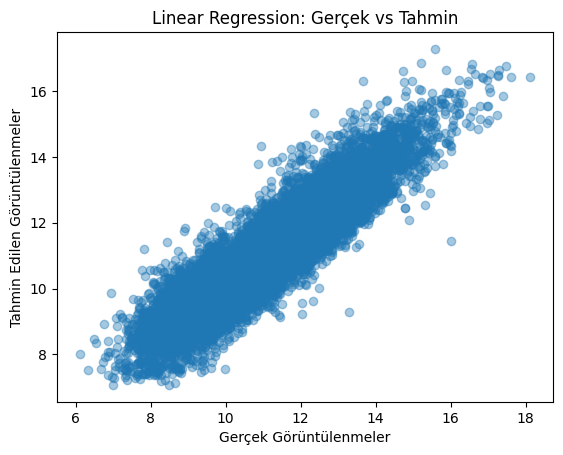

In [49]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Gerçek Görüntülenmeler")
plt.ylabel("Tahmin Edilen Görüntülenmeler")
plt.title("Linear Regression: Gerçek vs Tahmin")
plt.show()


In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Random Forest MSE: 0.5095977067067058
Random Forest R2: 0.8333138733983633


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,precision_score, recall_score, confusion_matrix

X = df[['log_likes', 'log_dislikes', 'log_comment_count']]
y = df['log_views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Decision Tree modelini kurup eğitelim
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# 4. Test verisiyle tahmin yapalım
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)  # Ortalama kare hata
r2_dt = r2_score(y_test, y_pred_dt)  # R-kare değeri

# Sonuçları yazdıralım
print(f"Ortalama Kare Hata (MSE): {mse_dt}")
print(f"R-kare (R2) Değeri: {r2_dt}")


Ortalama Kare Hata (MSE): 0.9136828300752354
R-kare (R2) Değeri: 0.7011402330047841
